#  Day 6: Predicting Heart Disease UCI using Machine Learning


 __My objective for this project:__

>Practice <br>
EDA <br>
Classification Problem <br>
Machine Learning <br>
Alternate  options <br>

__Note: I don't have any medical background.  This project is only for personal practice only. Results only to the confinement of the dataset__

##  Problem Definition

> Given data and information about a patients can we predict whether or not they have heart disease? 

##  Data

> Source: Kaggle <br>
    Title: Heart Disease UCI <br>
    by: ronit <br>
    link: https://www.kaggle.com/ronitf/heart-disease-uci  <br>
    Original Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease




##  Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease for this data set


##  Features


> 1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


###  Acknowledgement 

Inspiration: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/ <br>
Template: https://docs.google.com/spreadsheets/d/1y4EdxeAliOQw9CDHx0_brjmk-LUb3gfX52zLGSqLg_g/edit#gid=0

# Import Data & Libraries

## Import necessary libraries


In [99]:

## manipulation of data
import pandas as pd 

## Regular EDA 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Advance EDA
from pandas_profiling import ProfileReport
from pivottablejs import pivot_ui

# We want our plots to appear in the notebook
%matplotlib inline  

## Models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from lazypredict.Supervised import LazyClassifier

##Fine tunning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Import Data

In [2]:
heart = pd.read_csv("data/heart.csv")

# Exploratory Data Analysis

## Information of the  dataset

In [3]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
1   37    1   2       130   250    0        1      187      0     3.50      0   
2   41    0   1       130   204    0        0      172      0     1.40      2   
3   56    1   1       120   236    0        1      178      0     0.80      2   
4   57    0   0       120   354    0        1      163      1     0.60      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
heart.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1     0.20   
299   45    1   3       110   264    0        1      132      0     1.20   
300   68    1   0       144   193    1        1      141      0     3.40   
301   57    1   0       130   131    0        1      115      1     1.20   
302   57    0   1       130   236    0        0      174      0     0.00   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
heart.sample(frac=1, random_state=42).head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1     0.60   
228   59    1   3       170   288    0        0      159      0     0.20   
111   57    1   2       150   126    1        1      173      0     0.20   
246   56    0   0       134   409    0        0      150      1     1.90   
60    71    0   2       110   265    1        0      130      0     0.00   

     slope  ca  thal  target  
179      1   1     1       0  
228      1   0     3       0  
111      2   1     3       1  
246      1   2     3       0  
60       2   1     2       1

We can make necessary changes in the columns so that it's more readable and understandable 

In [6]:
heart.shape

(303, 14)

Rows: 303
Columns: 14 columns 
refer to the documentation above for more details

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data type int64 and float 64

In [8]:
#for smaller dataset; percentage of missing values
stats = []
for col in heart.columns:
    stats.append((col, heart[col].nunique(), heart[col].isnull().sum() * 100 / heart.shape[0], heart[col].value_counts(normalize=True, dropna=False).values[0] * 100, heart[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  \
0        age             41                          0.00   
1        sex              2                          0.00   
2         cp              4                          0.00   
3   trestbps             49                          0.00   
4       chol            152                          0.00   
5        fbs              2                          0.00   
6    restecg              3                          0.00   
7    thalach             91                          0.00   
8      exang              2                          0.00   
9    oldpeak             40                          0.00   
10     slope              3                          0.00   
11        ca              5                          0.00   
12      thal              4                          0.00   
13    target              2                          0.00   

    Percentage of values in the biggest category     type  
0                                           6.27    int64  
1                                          68.32    int64  
2                                          47.19    int64  
3                                          12.21    int64  
4                                           1.98    int64  
5                                          85.15    int64  
6                                          50.17    int64  
7                                           3.63    int64  
8                                          67.33    int64  
9                                          32.67  float64  
10                                         46.86    int64  
11                                         57.76    int64  
12                                         54.79    int64  
13                                         54.46    int64

In [9]:
heart[heart.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0     0.00   

     slope  ca  thal  target  
164      2   4     2       1

In [10]:
heart[heart['age'] == 38]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0     0.00   
164   38    1   2       138   175    0        1      173      0     0.00   
259   38    1   3       120   231    0        1      182      1     3.80   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  
259      1   0     3       0

__Thoughts__ 

> * It seems that the data is already been cleaned and ready for machine learning but let's explore more. 
* make the necessary adjustment so it's more readable.
* No missing values
* Mostly int64 and floats
* Let's assume it's duplicate values were coincidence

### Alternate during exploring dataset

Because the volume of the dataset is not that big we can use helpful libraries

In [11]:
prof = ProfileReport(heart)
prof
#prof.to_file(output_file='output.html') to save

In [12]:
# import pandas as pd
#syntax
# df = pd.read_csv("some_input.csv")
# from pivottablejs import pivot_ui
# pivot_ui(df)

pivot_ui(heart)

### Visualization 

In [13]:
# let's make a different dataframe for visualization
heart_viz = heart.copy()

In [14]:
heart_viz

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0     2.30   
1     37    1   2       130   250    0        1      187      0     3.50   
2     41    0   1       130   204    0        0      172      0     1.40   
3     56    1   1       120   236    0        1      178      0     0.80   
4     57    0   0       120   354    0        1      163      1     0.60   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1     0.20   
299   45    1   3       110   264    0        1      132      0     1.20   
300   68    1   0       144   193    1        1      141      0     3.40   
301   57    1   0       130   131    0        1      115      1     1.20   
302   57    0   1       130   236    0        0      174      0     0.00   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

####  Making the data more readable

In [15]:
#syntax
# rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI', 
#                               't20':'T20'}, inplace = True) 

heart_viz.rename(columns = {"cp": "chest pain type", 
                            "trestbps":"resting blood pressure",
                           "chol":"serum cholestoral", 
                            "fbs": "fasting blood sugar",
                           "restecg":"resting electrocardiographic",
                           "thalach":"maximum heart rate achieved",
                           "exang":"exercise induced angina",
                           "oldpeak":"ST depression induced by exercise relative to rest",
                           "slope":"slope of the peak exercise ST segment",
                           "ca":"number of major vessels",
                           "thal":"thalassemia",
                           "target":"have disease or not"}, inplace = True)



In [16]:
heart_viz

age  sex  chest pain type  resting blood pressure  serum cholestoral  \
0     63    1                3                     145                233   
1     37    1                2                     130                250   
2     41    0                1                     130                204   
3     56    1                1                     120                236   
4     57    0                0                     120                354   
..   ...  ...              ...                     ...                ...   
298   57    0                0                     140                241   
299   45    1                3                     110                264   
300   68    1                0                     144                193   
301   57    1                0                     130                131   
302   57    0                1                     130                236   

     fasting blood sugar  resting electrocardiographic  \
0                      1                             0   
1                      0                             1   
2                      0                             0   
3                      0                             1   
4                      0                             1   
..                   ...                           ...   
298                    0                             1   
299                    0                             1   
300                    1                             1   
301                    0                             1   
302                    0                             0   

     maximum heart rate achieved  exercise induced angina  \
0                            150                        0   
1                            187                        0   
2                            172                        0   
3                            178                        0   
4                            163                        1   
..                           ...                      ...   
298                          123                        1   
299                          132                        0   
300                          141                        0   
301                          115                        1   
302                          174                        0   

     ST depression induced by exercise relative to rest  \
0                                                 2.30    
1                                                 3.50    
2                                                 1.40    
3                                                 0.80    
4                                                 0.60    
..                                                 ...    
298                                               0.20    
299                                               1.20    
300                                               3.40    
301                                               1.20    
302                                               0.00    

     slope of the peak exercise ST segment  number of major vessels  \
0                                        0                        0   
1                                        0                        0   
2                                        2                        0   
3                                        2                        0   
4                                        2                        0   
..                                     ...                      ...   
298                                      1                        0   
299                                      1                        0   
300                                      1                        2   
301                                      1                        1   
302                                      1                        1   

     thalassemia  have disease or not  
0              1                    1  
1       

In [17]:
heart_viz_col = heart_viz.copy()

Wiki/google

>Angina: a condition marked by severe pain in the chest, often also spreading to the shoulders, arms, and neck, caused by an inadequate blood supply to the heart. <br>

> Thalassemia is an inherited blood disorder in which the body makes an abnormal form of hemoglobin. Hemoglobin is the protein molecule in red blood cells that carries oxygen. The disorder results in excessive destruction of red blood cells, which leads to anemia.



In [18]:
heart_viz['sex'].replace(to_replace=(0,1), value=('Female', 'Male'), inplace=True)
heart_viz['chest pain type'].replace(to_replace=(0,1,2,3), 
                                     value=("typical angina","atypical angina","non-anginal pain", " asymptomatic" )
                                     , inplace=True)
heart_viz['fasting blood sugar'].replace(to_replace=(0,1), value=('lower than 120mg/ml', 'greater than 120mg/ml'), inplace=True)
heart_viz['exercise induced angina'].replace(to_replace=(0,1), value=('Yes', 'No'), inplace=True)
heart_viz['resting electrocardiographic'].replace(to_replace=(0,1,2), 
                                        value=('normal', 'ST-T wave abnormality'," left ventricular hypertrophy"), inplace=True)
heart_viz['slope of the peak exercise ST segment'].replace(to_replace=(1,2,3), 
                                                    value=('upsloping', 'flat'," downsloping"), inplace=True)
heart_viz['have disease or not'].replace(to_replace=(0,1), 
                                                    value=('no', 'yes'), inplace=True)

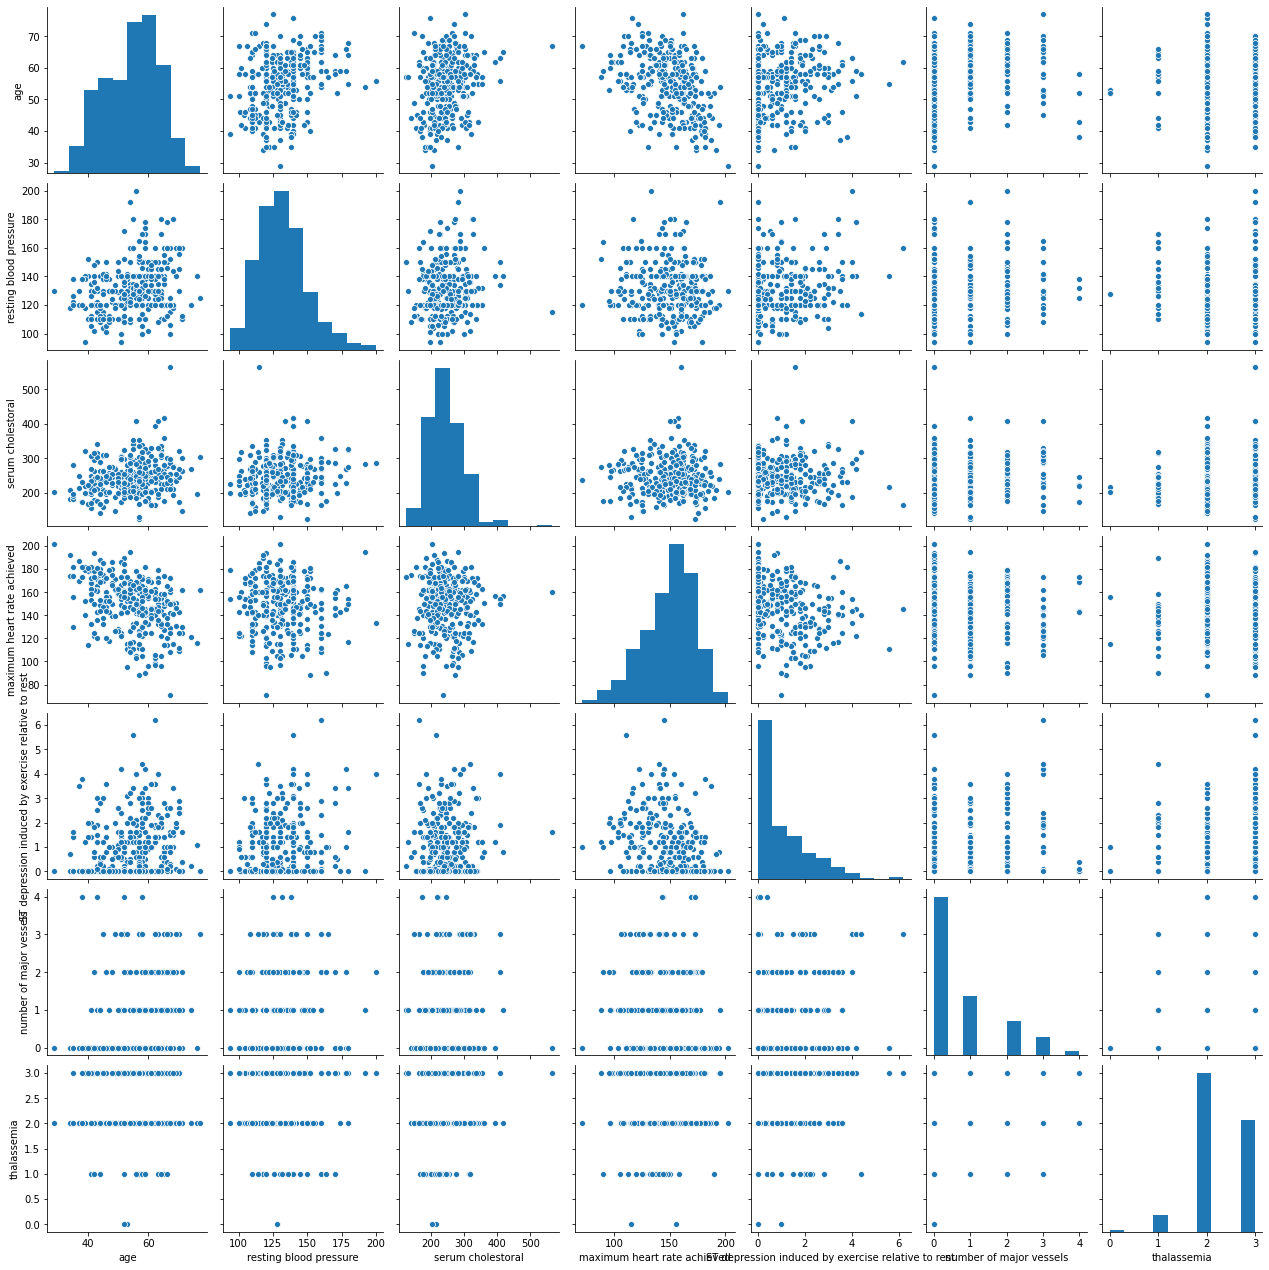

In [19]:
sns.pairplot(heart_viz)

Text(0.5, 1.0, 'Distribution of Age')

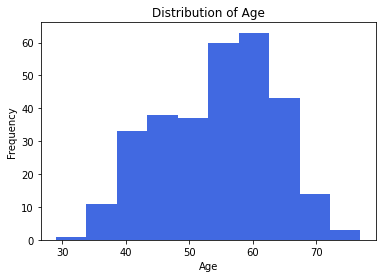

In [20]:
plt.hist(heart_viz['age'], color = "royalblue");
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Distribution of Age')

In [21]:
heart_viz['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

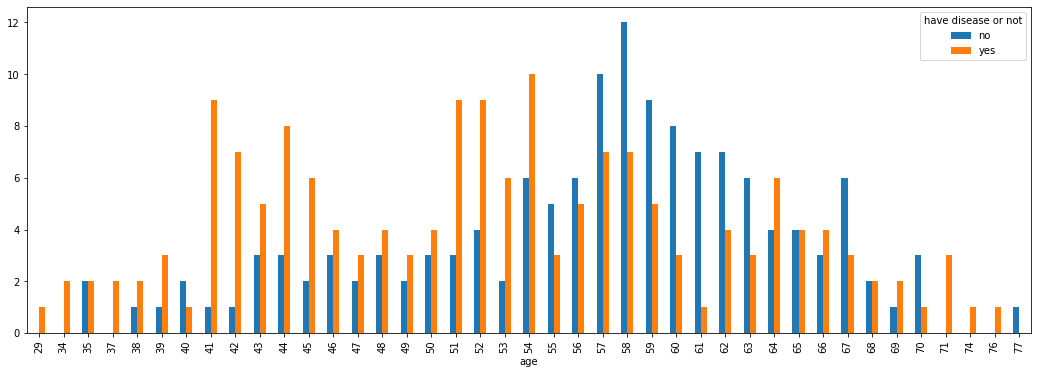

In [22]:
pd.crosstab(heart_viz["age"],heart_viz['have disease or not']).plot(kind = "bar",figsize=(18,6))

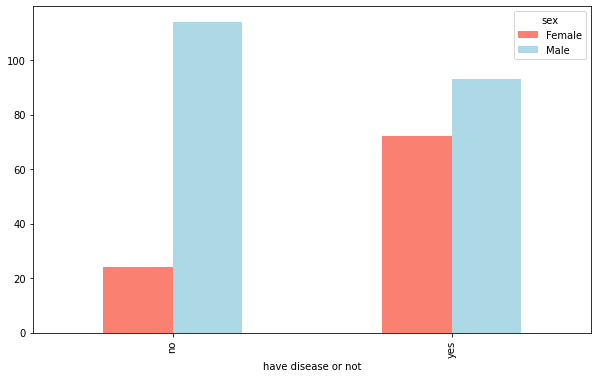

In [23]:
pd.crosstab(heart_viz['have disease or not'], heart_viz["sex"]).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

Text(0.5, 1.0, 'Top 10 Age Count ')

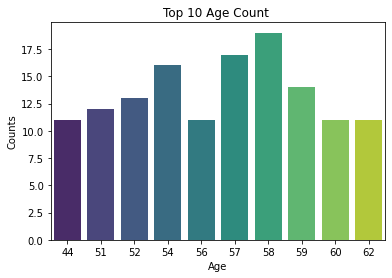

In [24]:
sns.barplot(x = heart_viz['age'].value_counts()[:10].index, y= heart_viz['age'].value_counts()[:10].values, palette= "viridis" )
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Top 10 Age Count ")

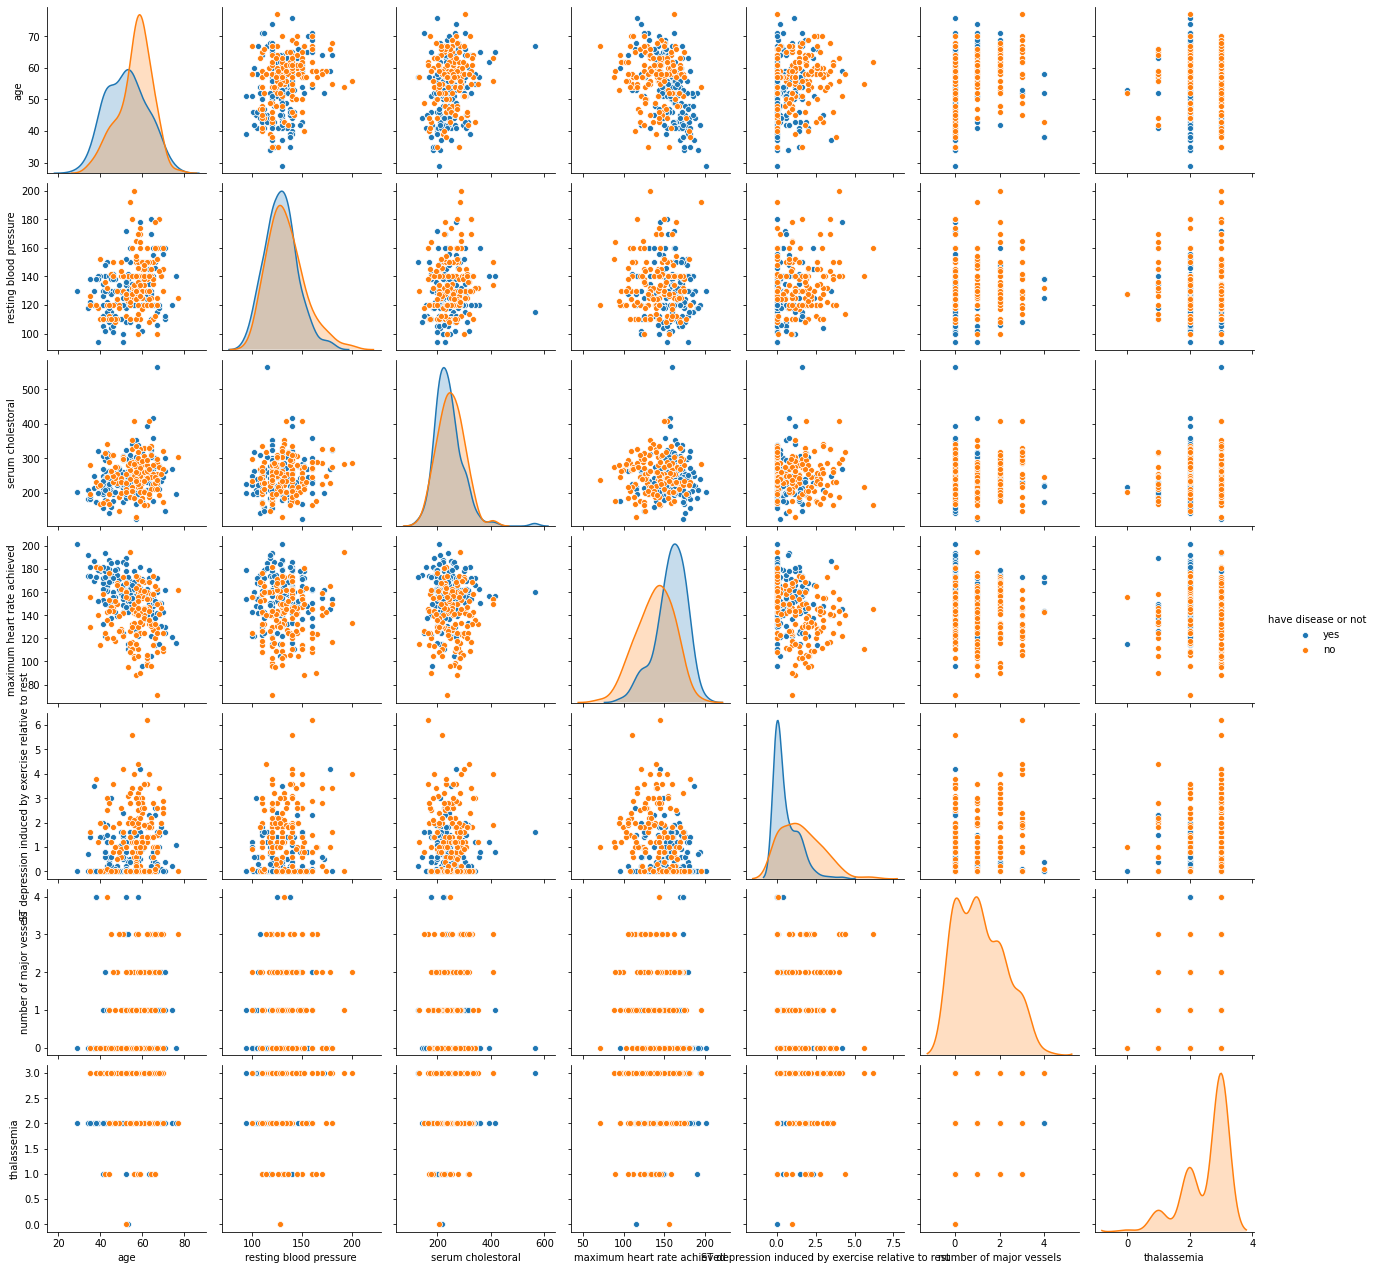

In [25]:
#sns.pairplot(df, hue="species")

sns.pairplot(heart_viz, hue="have disease or not")

In [26]:
heart_viz[heart_viz['thalassemia'] == 0]

age     sex   chest pain type  resting blood pressure  serum cholestoral  \
48    53  Female  non-anginal pain                     128                216   
281   52    Male    typical angina                     128                204   

       fasting blood sugar resting electrocardiographic  \
48     lower than 120mg/ml                       normal   
281  greater than 120mg/ml        ST-T wave abnormality   

     maximum heart rate achieved exercise induced angina  \
48                           115                     Yes   
281                          156                      No   

     ST depression induced by exercise relative to rest  \
48                                                0.00    
281                                               1.00    

    slope of the peak exercise ST segment  number of major vessels  \
48                                   flat                        0   
281                             upsloping                        0   

     thalassemia have disease or not  
48             0                 yes  
281            0                  no

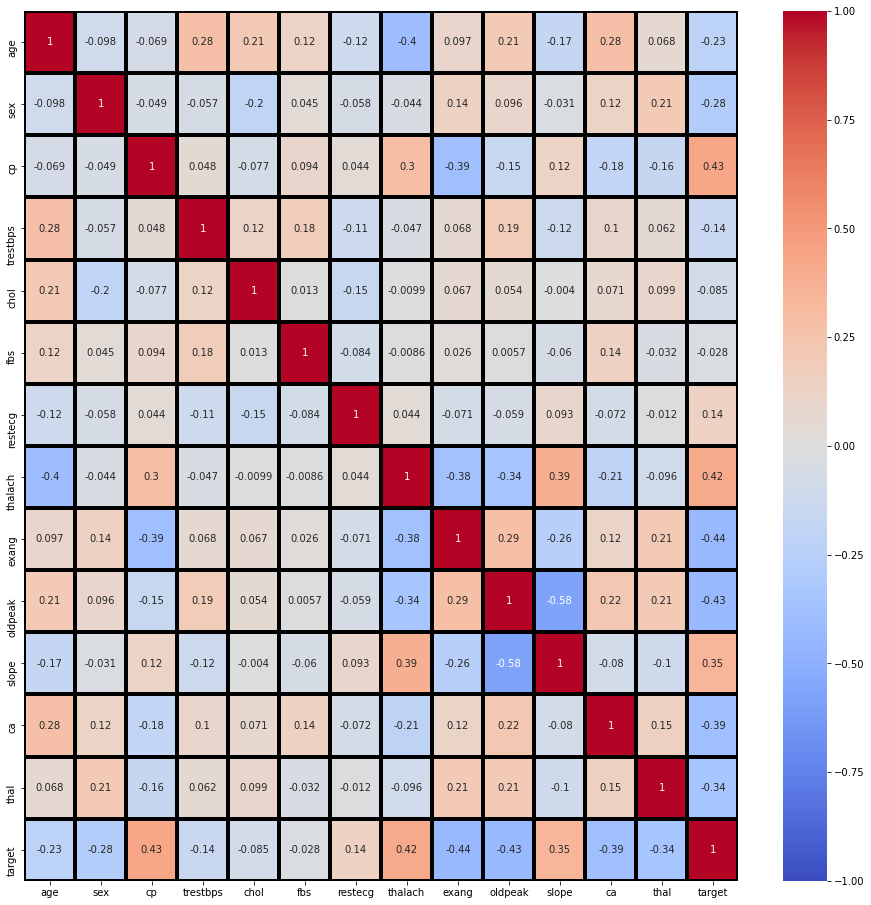

In [27]:
plt.figure(figsize = (16,16))
sns.heatmap(heart.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black');

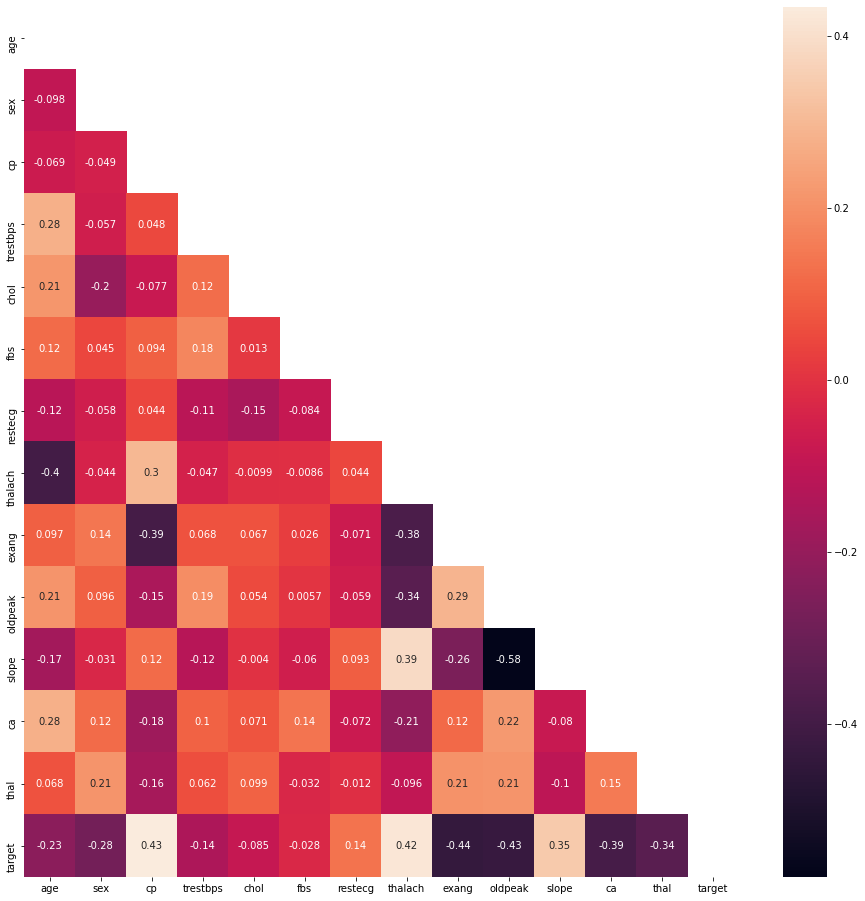

In [28]:
plt.figure(figsize = (16,16))
matrix = np.triu(heart.corr())
sns.heatmap(heart.corr(), annot=True, mask=matrix);

<AxesSubplot:title={'center':'Correlation with target'}>

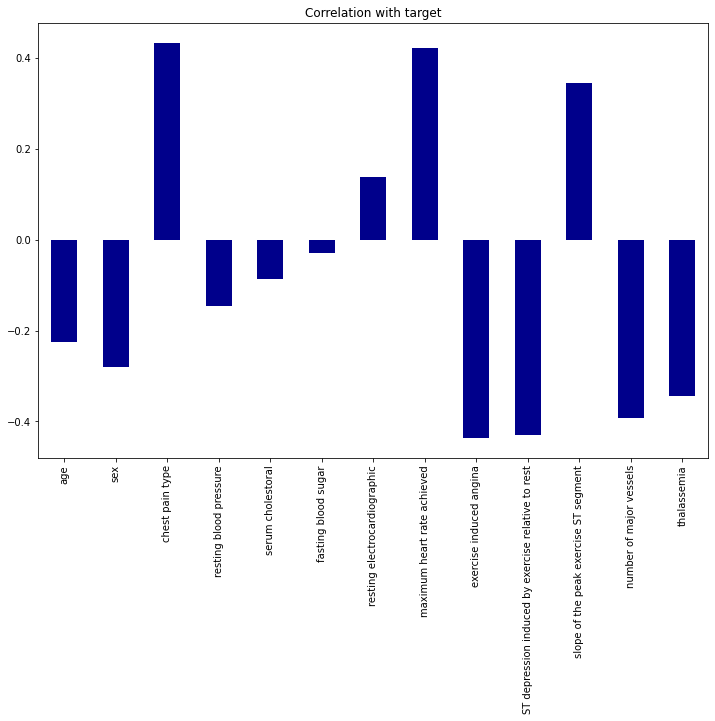

In [29]:
heart_viz_col.drop('have disease or not', axis=1).corrwith(heart_viz_col['have disease or not']).plot(kind='bar', grid=False, figsize=(12, 8), 
                                                   title="Correlation with target", color = 'darkblue')

In [30]:
heart_pos_col = ['chest pain type', 'slope of the peak exercise ST segment']

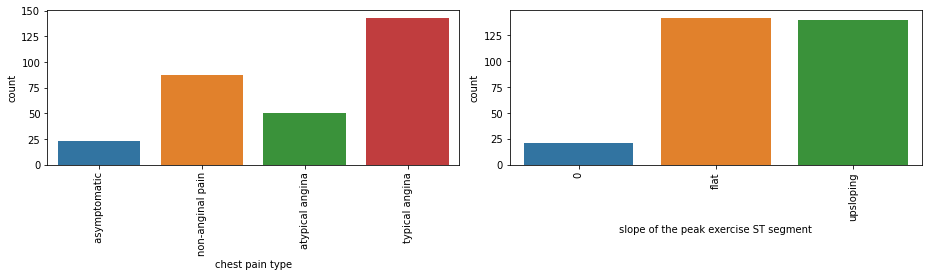

In [31]:
plt.figure(figsize=(13, 10))
i = 1
for col in heart_pos_col:
    plt.subplot(3, 2, i)
    
    sns.countplot(heart_viz[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    
    i += 1

plt.tight_layout()

In [32]:
heart_neg_col = ['sex', 'exercise induced angina', 'number of major vessels', 'thalassemia' ]

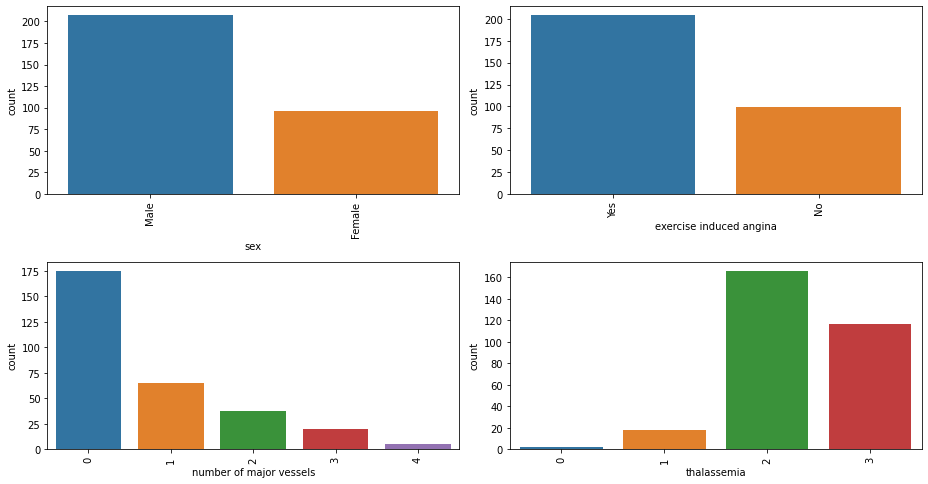

In [33]:
plt.figure(figsize=(13, 10))
i = 1
for col in heart_neg_col:
    plt.subplot(3, 2, i)
    
    sns.countplot(heart_viz[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    
    i += 1

plt.tight_layout()

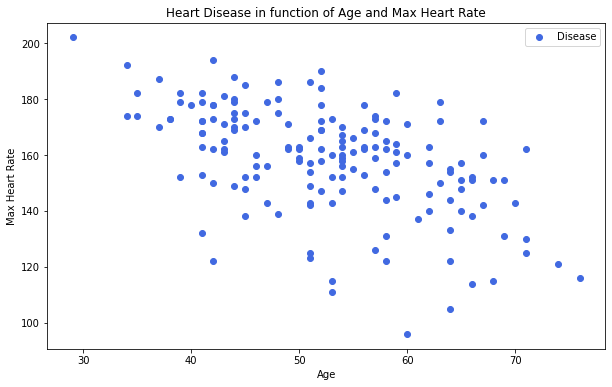

In [34]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(heart_viz['age'][heart_viz['have disease or not']=='yes'], 
            heart_viz['maximum heart rate achieved'][heart_viz['have disease or not']=='yes'], 
            c="royalblue") # define it as a scatter figure


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

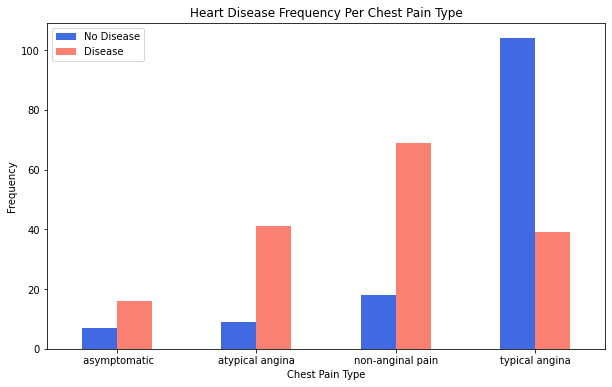

In [35]:
# Create a new crosstab and base plot
pd.crosstab(heart_viz['chest pain type'], heart_viz['have disease or not']).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["royalblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

# Train/Test Split

In [83]:
heart = pd.read_csv("data/heart.csv")

In [84]:
X = heart.drop("target", axis = 1)
y = heart['target']

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare for ML

__Dataset is already been prepared for ML__

# Pick your Models

__Binary Classification Problem__



<img src="./image/algorithm cheat sheet.PNG"/>

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



# Model Selection

## Model individiually

### Linear SVC

In [39]:
# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

LinearSVC()

In [40]:
predictions = clf.predict(X_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        29
           1       1.00      0.22      0.36        32

    accuracy                           0.59        61
   macro avg       0.77      0.61      0.53        61
weighted avg       0.78      0.59      0.52        61



### KNeighborsClassifier

In [42]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
predictions = clf_knn.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



#### KNeighborsClassifier n_neighbors 

In [45]:
clf_knn2 = KNeighborsClassifier(n_neighbors=8)
clf_knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [46]:
predictions = clf_knn2.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.71      0.69      0.70        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



### SVC

In [48]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [49]:
predictions = clf.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.53      1.00      0.70        32

    accuracy                           0.54        61
   macro avg       0.77      0.52      0.38        61
weighted avg       0.76      0.54      0.40        61



### Logistic Regression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Using for loop to model

In [54]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [55]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

__Logistic Regression has the highest accuracy score. Let's try to tune it__

## all in one 

In [86]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [87]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.78it/s]


In [88]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.89               0.88     0.88      0.89   
RidgeClassifierCV                  0.89               0.88     0.88      0.89   
SVC                                0.87               0.87     0.87      0.87   
NuSVC                              0.87               0.87     0.87      0.87   
GaussianNB                         0.87               0.87     0.87      0.87   
LinearSVC                          0.87               0.87     0.87      0.87   
BernoulliNB                        0.87               0.87     0.87      0.87   
RidgeClassifier                    0.87               0.87     0.87      0.87   
NearestCentroid                    0.87               0.87     0.87      0.87   
LinearDiscriminantAnalysis         0.87               0.87     0.87      0.87   
LabelPropagation                   0.85               0.85     0.85      0.85   
LabelSpreading                     0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LGBMClassifier                     0.85               0.85     0.85      0.85   
ExtraTreesClassifier               0.85               0.85     0.85      0.85   
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.84   
SGDClassifier                      0.84               0.84     0.84      0.84   
RandomForestClassifier             0.84               0.84     0.84      0.84   
XGBClassifier                      0.82               0.82     0.82      0.82   
BaggingClassifier                  0.80               0.81     0.81      0.80   
AdaBoostClassifier                 0.80               0.81     0.81      0.80   
Perceptron                         0.79               0.79     0.79      0.79   
ExtraTreeClassifier                0.79               0.79     0.79      0.79   
PassiveAggressiveClassifier        0.77               0.78     0.78      0.77   
DecisionTreeClassifier             0.75               0.76     0.76      0.75   
DummyClassifier                    0.52               0.52     0.52      0.52   
CheckingClassifier                 0.48               0.50     0.50      0.31   

                               Time Taken  
Model                                      
KNeighborsClassifier                 0.03  
CalibratedClassifierCV               0.08  
RidgeClassifierCV                    0.02  
SVC                                  0.02  
NuSVC                                0.03  
GaussianNB                           0.02  
LinearSVC                            0.03  
BernoulliNB                          0.02  
RidgeClassifier                      0.03  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.02  
LabelPropagation                     0.03  
LabelSpreading                       0.02  
LogisticRegression                   0.02  
LGBMClassifier                       0.10  
ExtraTreesClassifier                 0.22  
QuadraticDiscriminantAnalysis        0.02  
SGDClassifier                        0.02  
RandomForestClassifier               0.32  
XGBClassifier                        0.10  
BaggingClassifier                    0.06  
AdaBoostClassifier                   0.21  
Perceptron                           0.02  
ExtraTreeClassifier                  0.02  
PassiveAggressiveClassifier          0.02  
DecisionTreeClassifier               0.02  
DummyClassifier                      0.02  
CheckingClassifier                   0.02

__KNeighborsCLassifier__ maybe has the best accuracy, ROC, F1 Score and time taken. Let's try to fine tune it

# Model Tuning

## Tunning KNeighborsClassifier

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [59]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


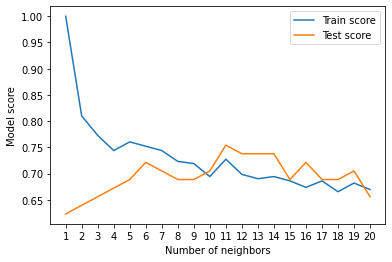

In [60]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Tuning models with  [`RandomizedSearchCV`]

#### Tunning `Logistic Regression` with [`RandomizedSearchCV`]

In [71]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [72]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [73]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

#### Tunning `RandomForestClassifier` with [`RandomizedSearchCV`]

In [79]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [80]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


In [81]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [82]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning a model with [`GridSearchCV`]

In [89]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [90]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [91]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [92]:
y_preds = gs_log_reg.predict(X_test)

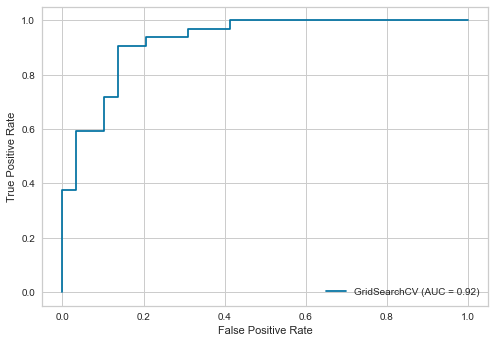

In [94]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

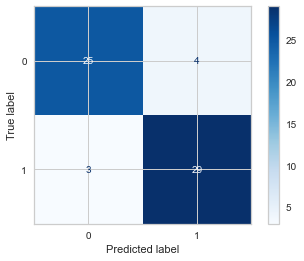

In [114]:
plot_confusion_matrix(gs_log_reg, X_test, y_test, cmap = "Blues")

In [101]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_log_reg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'class_names' is not defined

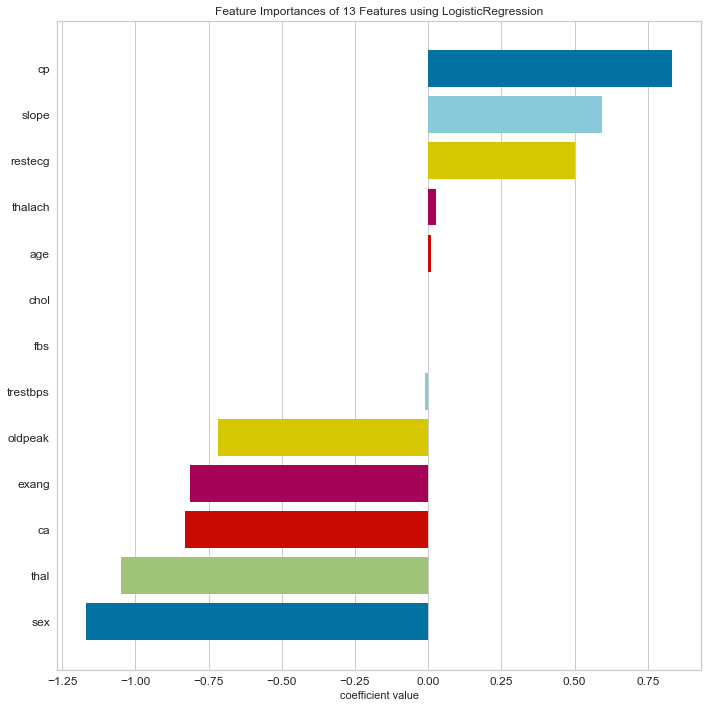

<AxesSubplot:title={'center':'Feature Importances of 13 Features using LogisticRegression'}, xlabel='coefficient value'>

In [61]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
plt.figure(figsize = (10, 10))
model = LogisticRegression()
viz = FeatureImportances(model, labels= X.columns, relative=False)
                         
viz.fit(X_train,y_train)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
viz.show()

# Pick the best model